В цьому ДЗ потренуємось виконувати Z-тести для тестування гіпотез в різних задачах. Для коректної імплементації та інтерпретації тестів рекоемндую переглянути спершу документацію:

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html

### Завдання 1: Z-тест для однієї вибірки

**Мета**: Перевірити, чи середнє значення вибірки відрізняється від гіпотетичного середнього.

**Припущення**: Середній ріст студентів університету вважається 170 см. Ми хочемо перевірити, чи середній ріст випадкової вибірки студентів істотно більший. Вибірка задана в змінній `heights`.

Для виконання завдання імпортуйте метод для проведення `ztest`, виконайте Z-тест з Python, виведіть p-value і зробіть заключення, чи справдилось припущення про середній зріст студентів на рівні значущості 0.05?

Використовуємо тут Z-тест, оскільки вибірка достатньо велика (більше 30 екземплярів) і можемо вважати, що її стандартне відхилення близьке до ст. відхилення генеральної сукупності, а значить - відоме.

In [1]:
import numpy as np
from statsmodels.stats.weightstats import ztest

In [2]:
heights = [174, 171, 175, 179, 170, 170, 179, 175, 169, 174, 169, 169, 173, 162, 163, 169, 166,
           173, 167, 164, 179, 170, 172, 164, 169, 175, 169, 174, 169, 169, 173, 162, 177]

* Порівнюємо середнє значення вибірки з 170, і перевіряємо, чи воно істотно більше.
* alternative='larger' означає, що це односторонній тест (> 170).

In [3]:
z_stat, p_value = ztest(heights, value=170, alternative='larger')

print(f"Z-статистика: {z_stat:.4f}")
print(f"P-значення: {p_value:.4f}")

Z-статистика: 0.8482
P-значення: 0.1982


#**Спостереження:**

Якщо p-value < 0.05 → відкидаємо H₀, тобто середній ріст істотно більший за 170 см.
Якщо p-value ≥ 0.05 → не відкидаємо H₀, тобто недостатньо доказів, щоб сказати, що середній ріст вищий.

Оскільки p = 0.1982 > 0.05, ми не відкидаємо нульову гіпотезу. Отже, немає статистично значущих доказів того, що середній ріст студентів більший за 170 см.

### Завдання 2: Z-тест для двох незалежних вибірок

**Завдання 2.1.**

**Мета**: Перевірити, чи існує статистична різниця між середніми оцінками двох груп студентів.

**Припущення**: Група A отримала новий навчальний курс, а група B продовжувала зі стандартним курсом. Ми перевіряємо, чи є новий курс ефективнішим.

Виконайте Z-тест з Python, виведіть p-value і зробіть заключення, чи справдилось припущення щодо студентів на рівні значущості 0.05?

In [4]:
from statsmodels.stats.weightstats import ztest

Перевіряємо гіпотезу:

H₀: середні оцінки однакові (μ₁ = μ₂)

H₁: середні оцінки не рівні (μ₁ ≠ μ₂)

In [5]:
group_a_scores = [78.55, 72.25, 79.88, 75.  , 76.54, 74.99, 87.26, 77.93, 72.71,
       82.11, 71.9 , 79.04, 68.2 , 71.36, 78.98, 81.69, 78.86, 77.42,
       76.49, 70.61, 74.4 , 75.7 , 83.29, 79.72, 69.18, 79.62, 76.07,
       74.62, 81.06, 83.15, 82.66, 73.8 , 76.45, 79.66, 82.88, 75.6 ,
       77.07, 72.47, 72.02, 82.06]

group_b_scores = [81.78, 74.64, 80.02, 76.81, 71.77, 76.81, 82.69, 74.82, 82.82,
       61.9 , 79.11, 75.44, 73.5 , 75.46, 65.06, 73.9 , 76.79, 82.39,
       72.41, 70.96, 72.49, 79.58, 76.64, 72.35, 77.57, 75.49, 79.84,
       71.49, 73.36, 73.04, 67.68, 76.48, 76.31, 75.03, 73.83, 67.92,
       72.9 , 73.29, 70.99, 74.19]

In [6]:
z_stat, p_value = ztest(group_a_scores, group_b_scores, alternative='two-sided')

print(f"Z-статистика: {z_stat:.4f}")
print(f"P-значення: {p_value:.4f}")

Z-статистика: 2.3574
P-значення: 0.0184


#**Спостереження**

Якщо p-value < 0.05, → відкидаємо H₀, отже різниця є.

Якщо p-value ≥ 0.05, → недостатньо доказів, що оцінки відрізняються.

Оскільки p-value < 0.05, ми відкидаємо нульову гіпотезу.
Отже, є статистично значуща різниця між оцінками студентів груп A та B.

Хочу перевірити, яка саме група краща:



In [7]:
mean_a = np.mean(group_a_scores)
mean_b = np.mean(group_b_scores)

print(f"Середнє групи A: {mean_a:.2f}")
print(f"Середнє групи B: {mean_b:.2f}")


Середнє групи A: 77.08
Середнє групи B: 74.74


На основі Z-тесту (двосторонній, p = 0.0184) ми відкидаємо нульову гіпотезу.
Є статистично значуща різниця між оцінками студентів двох груп.
При цьому, середній бал групи A вищий, тому є підстави припускати, що новий курс може бути ефективнішим.

**Завдання 2.2.**


**Мета**: Побачити, як впливає розмір вибірок на результат тесту.

**Завдання**: Уявіть, що з групи А ми маємо тільки перші 5 записів, а з групи В - усі. Таке могло статись, якщо ми вже маємо результати тестів учнів за попередньою програмою, а тести за новою програмою здали наразі лише 5 учнів і ми вирішили не чекати довше.
Виберіть перші 5 записів для групи А і проведіть t-test (для цього використовуємо наступний [метод](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)). Виведіть значення p-value. Зробіть висновок, який результат ви бачите щодо стат. значущості на рівні 0.05 для цього експерименту?

Тут проводимо t-test оскільки одна з вибірок - дуже мала.

In [8]:
from scipy.stats import ttest_ind
import numpy as np

# Дані
group_a_small = group_a_scores[:5]  # перші 5 з A
group_b_full = group_b_scores       # усі з B

# T-test
t_stat, p_value = ttest_ind(group_a_small, group_b_full, equal_var=False)  # Welch’s t-test

print(f"T-статистика: {t_stat:.4f}")
print(f"P-значення: {p_value:.4f}")

T-статистика: 1.1227
P-значення: 0.3011


#**Спостереження**

Вибірка занадто мала (5 студентів) — і тому тест має низьку статистичну силу (P-значення: 0.3011 (> 0.05)).


### Завдання 3\*: Z-тест для двох **пов'язаних** вибірок

**Мета**: Перевірити, чи вплинув тренінг на продуктивність працівників, коли всі справробітники проходили тренінг.

**Припущення**: Наші працівники проходять однаковий тренінг, і ми хочемо з'ясувати, чи покращилися їхні показники після тренінгу на рівні значущості 0.05. Виконайте Z-тест з Python, виведіть p-value і зробіть заключення, чи поліпшились показники працівників на рівні значущості 0.05?

Зверніть увагу, ці вибірки повʼязані між собою, значить не буде коректно виконати z-test між ними, натомість, ми можемо порівняти, чи різниця в результатах (продуктивності співробітників) є стат значущою.

In [9]:
from scipy.stats import ttest_rel

In [10]:
before_training = [57.82, 37.63, 36.8 , 55.22, 52.97, 52.5 , 53.46, 43.2 , 52.32,
       52.93, 42.86, 68.66, 54.74, 38.09, 56.57, 40.25, 57.87, 61.59,
       41.79, 59.63, 54.13, 58.22, 68.97, 47.55, 42.46, 41.1 , 41.84,
       49.23, 53.41, 52.77]

after_training = [62.47, 40.66, 42.7 , 57.69, 61.41, 56.76, 54.75, 44.06, 56.29,
       55.48, 47.28, 72.6 , 57.59, 39.39, 56.54, 42.36, 62.58, 65.01,
       42.3 , 62.98, 57.9 , 59.45, 72.28, 50.66, 43.18, 44.82, 45.96,
       54.4 , 58.52, 53.01]

In [11]:
t_stat, p_value = ttest_rel(after_training, before_training)

print(f"T-статистика: {t_stat:.4f}")
print(f"P-значення: {p_value:.4f}")


T-статистика: 9.1389
P-значення: 0.0000


#**Спостереження**

P-значення < 0.05 → нульову гіпотезу відхиляємо.
Отже, показники працівників після тренінгу статистично значуще покращились.
Відмінність у продуктивності не випадкова, а пов'язана саме з проходженням тренінгу.

Ще створю візуалізацію:

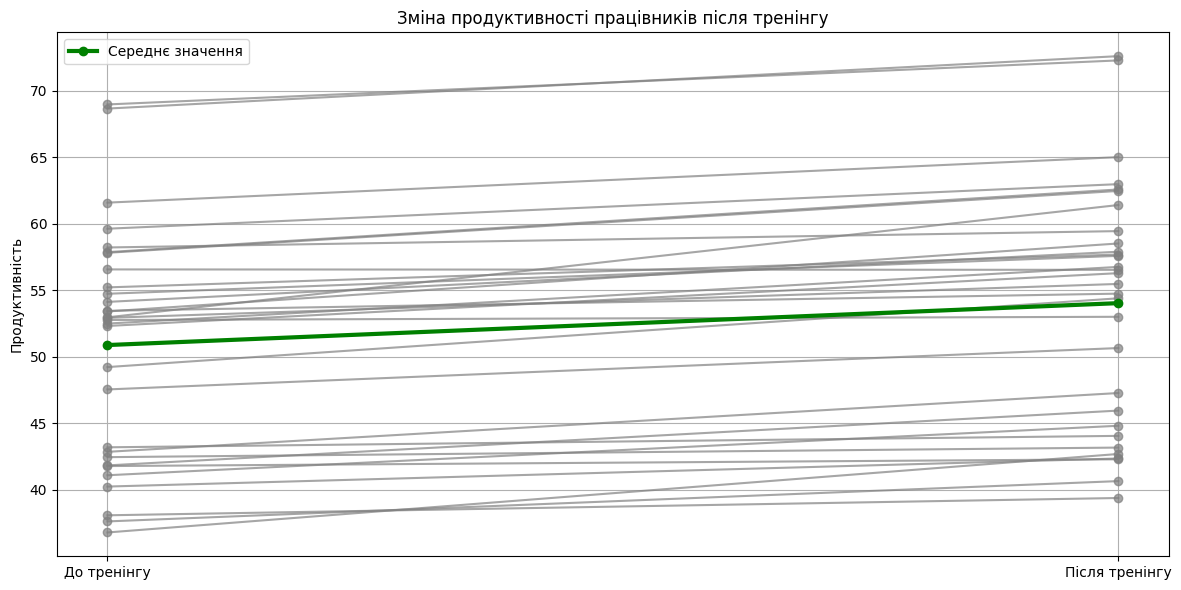

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Дані
before_training = [57.82, 37.63, 36.8 , 55.22, 52.97, 52.5 , 53.46, 43.2 , 52.32,
       52.93, 42.86, 68.66, 54.74, 38.09, 56.57, 40.25, 57.87, 61.59,
       41.79, 59.63, 54.13, 58.22, 68.97, 47.55, 42.46, 41.1 , 41.84,
       49.23, 53.41, 52.77]

after_training = [62.47, 40.66, 42.7 , 57.69, 61.41, 56.76, 54.75, 44.06, 56.29,
       55.48, 47.28, 72.6 , 57.59, 39.39, 56.54, 42.36, 62.58, 65.01,
       42.3 , 62.98, 57.9 , 59.45, 72.28, 50.66, 43.18, 44.82, 45.96,
       54.4 , 58.52, 53.01]

# Перетворюємо на масиви
before = np.array(before_training)
after = np.array(after_training)

# Створюємо індекси працівників
employees = np.arange(1, len(before) + 1)

# Створення графіка
plt.figure(figsize=(12, 6))
for i in range(len(before)):
    plt.plot([0, 1], [before[i], after[i]], marker='o', color='gray', alpha=0.7)

# Додаємо середні значення
plt.plot([0, 1], [np.mean(before), np.mean(after)], marker='o', color='green', linewidth=3, label='Середнє значення')

# Налаштування осей
plt.xticks([0, 1], ['До тренінгу', 'Після тренінгу'])
plt.ylabel('Продуктивність')
plt.title('Зміна продуктивності працівників після тренінгу')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
